In [5]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git


Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 91 (delta 43), reused 22 (delta 6), pack-reused 0
Unpacking objects: 100% (91/91), done.


In [6]:
ls

drive/  Mecab-ko-for-Google-Colab/  sample_data/


In [7]:
cd Mecab-ko-for-Google-Colab/

/content/Mecab-ko-for-Google-Colab


In [8]:
!bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 12.0MB/s 
     |████████████████████████████████| 450kB 47.0MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-07-07 04:36:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22c2:513, 2406:da00:ff00::22c3:9b0a, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?Signature=bG%2BL4t1CuYM%2BczTJuWtO1GDCIn0%3D&Expires=1625634258&AWSAccessKeyId=AKIA6KOSE

In [9]:
!pip install konlpy

In [10]:
from konlpy.tag import Mecab

In [11]:
mecab=Mecab()

In [12]:
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [13]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [14]:
!pwd

/content/Mecab-ko-for-Google-Colab


In [20]:
cd ../

/content


In [21]:
path_to_file='/content/drive/MyDrive/nlp/korean-english-park.train.ko'

In [23]:
with open(path_to_file,"r",encoding="UTF-8") as f:
  raw = f.read().splitlines()

  print("Data Size", len(raw))
  print("Example")
  for sen in raw[0:100][::20]: print(">>",sen)

Data Size 94123
Example
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


In [19]:
import pandas as pd

In [20]:
raw2 = pd.DataFrame(raw)

In [21]:
raw2.head()

,0
0,"개인용 컴퓨터 사용의 상당 부분은 ""이것보다 뛰어날 수 있느냐?"""
1,모든 광마우스와 마찬가지 로 이 광마우스도 책상 위에 놓는 마우스 패드를 필요로 하...
2,그러나 이것은 또한 책상도 필요로 하지 않는다.
3,"79.95달러하는 이 최첨단 무선 광마우스는 허공에서 팔목, 팔, 그외에 어떤 부분..."
4,정보 관리들은 동남 아시아에서의 선박들에 대한 많은 (테러) 계획들이 실패로 돌아갔...


In [22]:
raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94123 entries, 0 to 94122
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       94123 non-null  object
dtypes: object(1)
memory usage: 735.5+ KB


In [31]:
print (len(raw2.iloc[1,0]))

52


In [24]:
print(len(raw[0]))
print(type(raw))

36
<class 'list'>


In [25]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단길이 : ", min_len)  
print("문장의 최단길이 : ", max_len) 
print("문장의 최단길이 : ", sum_len//len(raw)) 

문장의 최단길이 :  1
문장의 최단길이 :  377
문장의 최단길이 :  60


Text(0.5, 1.0, 'Sentence Length Distribution')

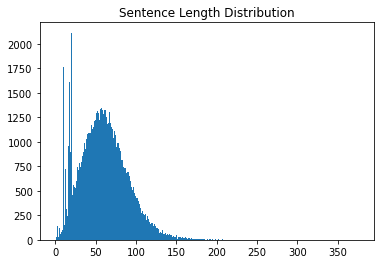

In [26]:
sentence_length = np.zeros((max_len), dtype=np.int)
for sen in raw:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")  

In [27]:
def check_sentence_with_length(raw, length):
  count=0
  for sen in raw:
    if len(sen)==length:
      print(sen)
      count+=1
      if count>100:return

In [28]:
check_sentence_with_length(raw, 1)

’


In [29]:
for idx, _sum in enumerate(sentence_length):
  if _sum > 1500:
    print("Outlier", idx+1)

Outlier 11
Outlier 19
Outlier 21


In [30]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

In [31]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))
print("data size :", len(cleaned_corpus))

for sen in cleaned_corpus:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이 :", min_len)  
print("문장의 최단 길이 :", max_len)
print("문장의 최단 길이 :", sum_len // len(cleaned_corpus))


data size : 77591
문장의 최단 길이 : 1
문장의 최단 길이 : 377
문장의 최단 길이 : 64


In [32]:
check_sentence_with_length(cleaned_corpus, 11)

tribunal 법정
standard 표준
케냐 야생동물 고아원
폭탄테러가 공포 유발
그녀의 아름다운 눈.
고 소식통이 전했다.
를 외치며 기뻐했다.
원화 강세 언제까지?
아기가 숨을 멈출 때
이전 보기 다음 보기
정권을 잡다[장악하다
미래의 최첨단 사무실
산 위를 나는 느낌.
는 돌발질문을 했다.
미래 동맹 정책 구상
키스를 잘 하는 방법
9. 몇 분간의 명상
이력서와 자기 소개서
크라이슬러. 조업중단
나는 크게 실망했다.
제발 답변을 주세요!
levee 제방, 둑
로그인 Korea사전
- 모르고 있습니다.
우리는 운이 좋았다.
대통령 후보자의 지명
라고 조던이 말했다.
대답은 다음과 같다.
raft 다수, 다량
스피어스가 뚱뚱한가?
좀 더 말씀해주시죠.
- 네, 보이는군요.
하와이, 빅 아일랜드
resign 사퇴하다
시대가 변하고 있다.
그 이유는 간단하다.
전유를 넣은 카페라떼
경유 1200원대로…
(정당의) 원내 총무
pledge 서약하다
원문기사 원문기사보기
meantime 한편
의자는 비어 있었다.
그는 "잘 모르겠다.
이 일은 계속됩니다.
Congress 의회
끌어내다, 철수시키다
세 시간쯤 걸었을까?
더 내려야 하는 이유
비관적인, 염세주의의
hearing 청문회
남한의 객관적 평가?
"사과할 것이 없다.
큰 파티는 아니지요.
처음에는 장난이었다.
지하철 타기 겁난다.
사업의) 합병, 합동
외교통상부 이슬람교도
본서, 본부, 사령부
건물 전체 무너져내려
작은 못이 아닙니다.
천재 소녀의 '부활'
디즈니사만이 아니다.
그들은 신중했습니다.
조금은 새침한 샬롯？
(아직 읽고있습니까?
brisk 활기를 띤


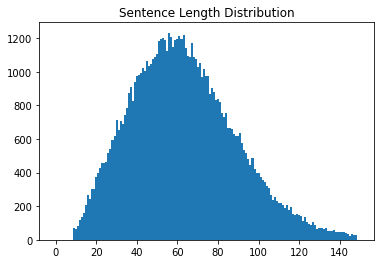

In [33]:
max_len = 150
min_len = 10
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s)>= min_len)]
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
  sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

공백 토큰화

In [35]:
def tokenize(corpus):
  tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
  tokenizer.fit_on_texts(corpus)

  tensor = tokenizer.texts_to_sequences(corpus)
  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,padding='post' )
  return tensor, tokenizer


In [36]:
split_corpus =[]

for kor in filtered_corpus:
  
  split_corpus.append(kor.split())



In [37]:
split_tensor, split_tokenizer = tokenize(split_corpus)

In [40]:
print("Split token:", len(split_tokenizer.index_word))

Split token: 237435


In [41]:
for idx, word in enumerate(split_tokenizer.word_index):
  print(idx, ":", word)
  if idx > 10: break



0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


In [42]:
def mecab_split(sentence):
  
  return mecab.morphs(sentence)

mecab_corpus =[]

for kor in filtered_corpus:
  mecab_corpus.append(mecab_split(kor))


In [43]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)
print("Mecab Vocab Size :", len(mecab_tokenizer.index_word))



Mecab Vocab Size : 52279


In [ ]:
# decoding

# 1. mecab_tokenizer.sequences_to_texts()
# 2. tokenizer.index_word 

In [44]:
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])


다른 기술 과 같이 키스 하 는 기술 도 개선 될 수 있 다 .


In [45]:
sentence = " "
for w in mecab_tensor[100]:
  if w == 0: continue
  sentence += mecab_tokenizer.index_word[w] + " "


print(sentence)  

 다른 기술 과 같이 키스 하 는 기술 도 개선 될 수 있 다 . 


In [1]:
import re, collections


In [2]:
num_merges = 10

In [3]:
dictionary = {'l o w </w':5,
              'l o w e r </w':2,
              'n e w e s t </w':6,
              'w i d e s t </w':3
              }

In [21]:
def get_stats(dictionary):
  pairs = collections.defaultdict(int)
  for word, freq in dictionary.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i], symbols[i+1]] += freq
  print("pair frequency:", dict(pairs))
  return pairs


In [19]:
def merge_dictionary(pair, v_in):
  v_out = {}
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\S)'+ bigram + r'(?<!\S)')

  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out[w_out] = v_in[word]
  return v_out

In [22]:
bpe_codes = {}
bpe_codes_reverse = {}
for i in range(num_merges):
  print(">> Step {0}".format(i+1))
  pairs = get_stats(dictionary)
  best = max(pairs, key=pairs.get)
  dictionary = merge_dictionary(best, dictionary)

  bpe_codes[best] = i
  bpe_codes_reverse[best[0] + best[1]] = best

  print("new merge: {}".format(best))
  print("dictionary: {}".format(dictionary))

>> Step 1
pair frequency: {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w': 5, 'l o w e r </w': 2, 'n e w e s t </w': 6, 'w i d e s t </w': 3}
>> Step 2
pair frequency: {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w': 5, 'l o w e r </w': 2, 'n e w e s t </w': 6, 'w i d e s t </w': 3}
>> Step 3
pair frequency: {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w

In [23]:
print(bpe_codes)

{('e', 's'): 9}


In [34]:
def get_pairs(word):
  pairs = set()
  prev_char = word[0]
  for char in word[1:]:
    pairs.add((prev_char, char))
    prev_char = char
  return pairs

In [25]:
orig = 'hi'
word = tuple(orig) + ('</w>',)
print(word)

('h', 'i', '</w>')


In [72]:
def encode(orig):
  word = tuple(orig)+ ('</w>',)
  print("__word split into characters:__ <tt>{}<tt>".format(word))
  

  pairs = get_pairs(word)

  if not pairs:
    return orig

  iteration = 0
  while True:
    iteration += 1
    print("_iteration {}:_".format(iteration))
    
    print("Bigram word:{}".format(pairs))
    bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
    print("candidate for merging: {}".format(bigram))
    if bigram not in bpe_codes:
      print("__Candidate not in BPE merges, algorithm stops.__")
      break
    first, second = bigram
    new_word = []
    i = 0
    while i < len(word):
      try:
        j = word.index(first, i)
        new_word.extend(word[i:j])
        i = j
      except:
        new_word.extend(word[i:])
        break

      if word[i] == first and i < len(word)-1 and word[i+1] == second:
        new_word.append(first+second)
        i += 2
      else:
        new_word.append(word[i])
        i += 1
    new_word = tuple(new_word)
    word = new_word
    print("word after merging : {}".format(word))
    if len(word) == 1:
      break
    else:
      pairs = get_pairs(word)
  
  # 특별토큰인 </w>는 출력하지 않는다.
  if word[-1] == '</w>':
    word = word[:-1]
  elif word[-1].endswith('</w>'):
    word = word[:-1] + (word[-1].replace('</w>', ''), )
  return word
 

In [73]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')<tt>
_iteration 1:_
Bigram word:{('l', 'o'), ('k', 'i'), ('o', 'k'), ('i', '</w>')}
candidate for merging: ('l', 'o')
__Candidate not in BPE merges, algorithm stops.__


('l', 'o', 'k', 'i')

In [74]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')<tt>
_iteration 1:_
Bigram word:{('e', 's'), ('l', 'o'), ('o', 'w'), ('s', 't'), ('w', 'e'), ('t', '</w>')}
candidate for merging: ('e', 's')
word after merging : ('l', 'o', 'w', 'es', 't', '</w>')
_iteration 2:_
Bigram word:{('l', 'o'), ('es', 't'), ('w', 'es'), ('o', 'w'), ('t', '</w>')}
candidate for merging: ('l', 'o')
__Candidate not in BPE merges, algorithm stops.__


('l', 'o', 'w', 'es', 't')

In [40]:
import tensorflow_datasets as tfds
import urllib.request
import pandas as pd


In [42]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7fbb93c48190>)

In [44]:
train_df = pd.read_csv('IMDb_Reviews.csv')

In [45]:
print(train_df)

                                                  review  sentiment
0      My family and I normally do not watch local mo...          1
1      Believe it or not, this was at one time the wo...          0
2      After some internet surfing, I found the "Home...          0
3      One of the most unheralded great works of anim...          1
4      It was the Sixties, and anyone with long hair ...          0
...                                                  ...        ...
49995  the people who came up with this are SICK AND ...          0
49996  The script is so so laughable... this in turn,...          0
49997  "So there's this bride, you see, and she gets ...          0
49998  Your mind will not be satisfied by this nobud...          0
49999  The chaser's war on everything is a weekly sho...          1

[50000 rows x 2 columns]


In [46]:
train_df['review']

0        My family and I normally do not watch local mo...
1        Believe it or not, this was at one time the wo...
2        After some internet surfing, I found the "Home...
3        One of the most unheralded great works of anim...
4        It was the Sixties, and anyone with long hair ...
                               ...                        
49995    the people who came up with this are SICK AND ...
49996    The script is so so laughable... this in turn,...
49997    "So there's this bride, you see, and she gets ...
49998    Your mind will not be satisfied by this nobud...
49999    The chaser's war on everything is a weekly sho...
Name: review, Length: 50000, dtype: object

In [47]:
train_df['sentiment']

0        1
1        0
2        0
3        1
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [48]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(train_df['review'], target_vocab_size=2**13)

In [49]:
print(tokenizer.subwords[:100])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 't_', 'as_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', 'are_', ' (', 'have_', 'his_', 'film_', 'not_', 'be_', 'you_', 'ing_', ' "', 'ed_', 'it', 'd_', 'an_', 'at_', 'by_', 'he_', 'one_', 'who_', 'from_', 'y_', 'or_', 'e_', 'like_', 'all_', '" ', 'they_', 'so_', 'just_', 'has_', ') ', 'about_', 'her_', 'out_', 'This_', 'some_', 'movie', 'ly_', 'film', 'very_', 'more_', 'It_', 'what_', 'would_', 'when_', 'if_', 'good_', 'up_', 'which_', 'their_', 'only_', 'even_', 'my_', 'really_', 'had_', 'can_', 'no_', 'were_', 'see_', '? ', 'she_', 'than_', '! ', 'there_', 'been_', 'get_', 'into_', 'will_', ' - ', 'much_', 'n_', 'because_', 'ing']


In [50]:
print(train_df['review'][20])

Pretty bad PRC cheapie which I rarely bother to watch over again, and it's no wonder -- it's slow and creaky and dull as a butter knife. Mad doctor George Zucco is at it again, turning a dimwitted farmhand in overalls (Glenn Strange) into a wolf-man. Unfortunately, the makeup is virtually non-existent, consisting only of a beard and dimestore fangs for the most part. If it were not for Zucco and Strange's presence, along with the cute Anne Nagel, this would be completely unwatchable. Strange, who would go on to play Frankenstein's monster for Unuiversal in two years, does a Lenny impression from "Of Mice and Men", it seems.<br /><br />*1/2 (of Four)


In [54]:
print("토큰화된 샘플 질문:{}".format(tokenizer.encode(train_df['review'][20])))

토큰화된 샘플 질문:[1590, 4162, 132, 7107, 1892, 2983, 578, 76, 12, 4632, 3422, 7, 160, 175, 372, 2, 5, 39, 8051, 8, 84, 2652, 497, 39, 8051, 8, 1374, 5, 3461, 2012, 48, 5, 2263, 21, 4, 2992, 127, 4729, 711, 3, 1391, 8044, 3557, 1277, 8102, 2154, 5681, 9, 42, 15, 372, 2, 3773, 4, 3502, 2308, 467, 4890, 1503, 11, 3347, 1419, 8127, 29, 5539, 98, 6099, 58, 94, 4, 1388, 4230, 8057, 213, 3, 1966, 2, 1, 6700, 8044, 9, 7069, 716, 8057, 6600, 2, 4102, 36, 78, 6, 4, 1865, 40, 5, 3502, 1043, 1645, 8044, 1000, 1813, 23, 1, 105, 1128, 3, 156, 15, 85, 33, 23, 8102, 2154, 5681, 5, 6099, 8051, 8, 7271, 1055, 2, 534, 22, 1, 3046, 5214, 810, 634, 8120, 2, 14, 71, 34, 436, 3311, 5447, 783, 3, 6099, 2, 46, 71, 193, 25, 7, 428, 2274, 2260, 6487, 8051, 8, 2149, 23, 1138, 4117, 6023, 163, 11, 148, 735, 2, 164, 4, 5277, 921, 3395, 1262, 37, 639, 1349, 349, 5, 2460, 328, 15, 5349, 8127, 24, 10, 16, 10, 17, 8054, 8061, 8059, 8062, 29, 6, 6607, 8126, 8053]


In [65]:
sample_string1 = "it's mind_blowing to me this film was even made. "

In [66]:
tokenized_string1 = tokenizer.encode(sample_string1)
print("after {}".format(tokenized_string1))

original_string = tokenizer.decode(tokenized_string1)
print(" original {}".format(original_string))

after [39, 8051, 8, 910, 8107, 2169, 36, 7, 103, 14, 32, 18, 79, 681, 3]
 original it's mind_blowing to me this film was even made. 


In [67]:
print(tokenizer.vocab_size)

8268


In [68]:
for ts in tokenized_string1:
  print('{}---->{}'.format(ts, tokenizer.decode([ts])))

39---->it
8051---->'
8---->s 
910---->mind
8107---->_
2169---->blow
36---->ing 
7---->to 
103---->me 
14---->this 
32---->film 
18---->was 
79---->even 
681---->made
3---->. 


In [ ]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

In [69]:
sample_string1 = "it's mind_blowing to me this film was evenxyz made. "

tokenized_string1 = tokenizer.encode(sample_string1)
print("after {}".format(tokenized_string1))

original_string = tokenizer.decode(tokenized_string1)
print(" original {}".format(original_string))

after [39, 8051, 8, 910, 8107, 2169, 36, 7, 103, 14, 32, 18, 7974, 8132, 8133, 997, 681, 3]
 original it's mind_blowing to me this film was evenxyz made. 


In [70]:
for ts in tokenized_string1:
  print('{}---->{}'.format(ts, tokenizer.decode([ts])))

39---->it
8051---->'
8---->s 
910---->mind
8107---->_
2169---->blow
36---->ing 
7---->to 
103---->me 
14---->this 
32---->film 
18---->was 
7974---->even
8132---->x
8133---->y
997---->z 
681---->made
3---->. 


In [75]:
pip install sentencepiece

     |████████████████████████████████| 1.2MB 23.9MB/s 


In [88]:
import sentencepiece as spm
import pandas as pd
import urllib.request
import csv


In [90]:
train_df = pd.read_csv('IMDb_Reviews.csv')

In [91]:
train_df

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0
...,...,...
49995,the people who came up with this are SICK AND ...,0
49996,"The script is so so laughable... this in turn,...",0
49997,"""So there's this bride, you see, and she gets ...",0
49998,Your mind will not be satisfied by this nobud...,0


In [92]:
print(('review', len(train_df)))

('review', 50000)


In [96]:
with open('imdb_review.txt','w', encoding='utf8') as f:
  f.write('\n'.join(train_df['review']))

In [97]:
spm.SentencePieceTrainer.Train('--input=imdb_review.txt --model_prefix=imdb --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

In [98]:
vocab_list = pd.read_csv('imdb.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,0,1
2076,▁hell,-2073
2993,uted,-2990
3176,▁disg,-3173
561,augh,-558
247,ake,-244
1855,▁techn,-1852
3898,pected,-3895
4003,▁aim,-4000
2394,▁tale,-2391
4552,reck,-4549
